Audio original:


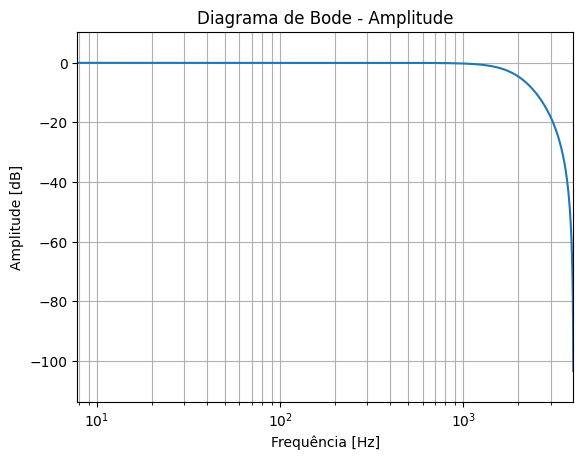

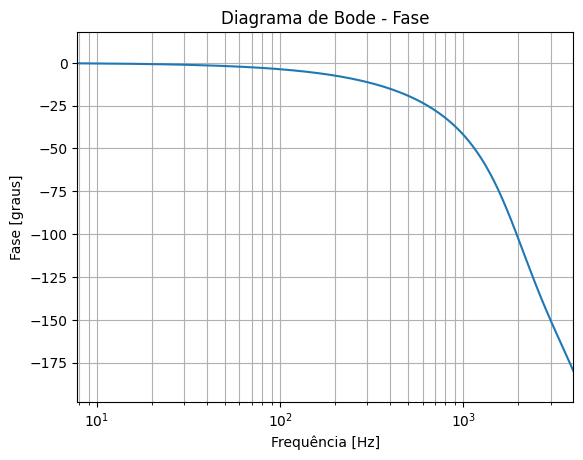

Audio filtrado:


In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
from IPython.display import Audio

# Ler o arquivo de áudio e reamostrar para 8000 Hz
data, fs_orig = librosa.load('teste.wav', sr=None)
data = librosa.resample(data, orig_sr=fs_orig, target_sr=8000)

# Reproduzir o áudio original
print("Audio original:")
display(Audio('teste.wav'))

fs = 8000  # Frequência de amostragem (Hz)
fc = 0.45 * fs / 2  # Frequência de corte (Hz)

b, a = signal.butter(2, fc/(fs/2), 'low')  # filtro Butterworth de segunda ordem

w, h = signal.freqz(b, a, fs=fs)
# Diagrama da amplitude
plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Diagrama de Bode - Amplitude')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

# Diagrama de fase
plt.figure()
plt.semilogx(w, np.unwrap(np.angle(h))*180/np.pi)  # unwrap é usado para evitar saltos de -pi para pi
plt.title('Diagrama de Bode - Fase')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Fase [graus]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

# Aplica o filtro ao sinal de áudio
filtered_data = signal.lfilter(b, a, data)

# Normaliza para 16-bit audio
filtered_data = np.int16(filtered_data/np.max(np.abs(filtered_data)) * 32767)

# Salva o áudio filtrado em um novo arquivo
wavfile.write('output.wav', fs, filtered_data)

# Reproduzir o áudio filtrado
print("Audio filtrado:")
display(Audio('output.wav'))